# Reading in your data

Most of the time when you have a network, you have a list of elements with something in common. In this case, we have a bunch of people from the [Revolutionary War](https://en.wikipedia.org/wiki/American_Revolutionary_War) who were in different clubs.

How connected are the people? How connected are the clubs? Network analysis will tell us this! Let's read in the data.

In [4]:
import pandas as pd

df = pd.read_csv("clubs.csv")
df.head(3)

,name,club
0,Adams John,North Caucus
1,Adams John,Long Room Club
2,Adams Samuel,North Caucus


First thing we need to do is **move the node name into the index** - we're going to massage our data a little bit, and if we don't do this we're going to lose our names. 

In [5]:
df.set_index('name', inplace=True)
df.head(3)

,club
name,
Adams John,North Caucus
Adams John,Long Room Club
Adams Samuel,North Caucus


### Reshaping our data

Unfortunately this data comes as a list of pairs - people and their clubs. In order to do Network Stuff on it, we need to change it up a little bit.

**If your data every looks like our data, you can always use this code.** If you want to know details, it's creating a pivot table, converting anything with data into `True`/`False`, then converting those to `1`/`0`. If you want to see it step-by-step, feel free to delete the `.astype(bool).astype(int)` part and check it out.

In [3]:
membership = df.pivot(columns='club', values='club').astype(bool).astype(int)
membership.head(3)

club,Boston Committee,London Enemies,Long Room Club,Loyal Nine,North Caucus,St Andrews Lodge,Tea Party
name,,,,,,,
Adams John,0,0,1,0,1,0,0
Adams Samuel,1,1,1,0,1,0,0
Allen Dr,0,0,0,0,1,0,0


**This is what we need!** Every column is a possible connection, and every row is a node.

## Counting the connections

Now we need to see **how connected people are to one another**, or **how connected the clubs are to one another**. Do two people go to a lot of the same clubs? Do clubs have members in common with one another?

To answer this, we need to take the [dot product](https://www.mathsisfun.com/algebra/vectors-dot-product.html) between the dataframe and the **transposition** of the dataframe.

### What is a transposition?

The transposition is just when you flip the columns and rows, like this:

In [9]:
# Normal
membership.head(2)

club,Boston Committee,London Enemies,Long Room Club,Loyal Nine,North Caucus,St Andrews Lodge,Tea Party
name,,,,,,,
Adams John,0,0,1,0,1,0,0
Adams Samuel,1,1,1,0,1,0,0


In [10]:
# Transposed
membership.T.head(2)

name,Adams John,Adams Samuel,Allen Dr,Appleton Nathaniel,Ash Gilbert,Austin Benjamin,Austin Samuel,Avery John,Baldwin Cyrus,Ballard John,...,Whitwell William,Williams Jeremiah,Williams Jonathan,Williams Thomas,Willis Nathaniel,Wingfield William,Winslow John,Winthrop John,Wyeth Joshua,Young Thomas
club,,,,,,,,,,,,,,,,,,,,,
Boston Committee,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
London Enemies,0,1,0,0,0,1,1,1,1,0,...,1,0,1,0,0,0,0,1,0,0


## Using the transposition and the dot product to calculate connectedness

### Connectedness for people

To see how **people are connected to people**, we'll use this code here...

In [16]:
people_adj = membership.dot(membership.T)
people_adj.head()

name,Adams John,Adams Samuel,Allen Dr,Appleton Nathaniel,Ash Gilbert,Austin Benjamin,Austin Samuel,Avery John,Baldwin Cyrus,Ballard John,...,Whitwell William,Williams Jeremiah,Williams Jonathan,Williams Thomas,Willis Nathaniel,Wingfield William,Winslow John,Winthrop John,Wyeth Joshua,Young Thomas
name,,,,,,,,,,,,,,,,,,,,,
Adams John,2,2,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
Adams Samuel,2,4,1,2,0,1,1,1,1,1,...,1,0,1,0,0,0,1,2,0,2
Allen Dr,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
Appleton Nathaniel,1,2,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2
Ash Gilbert,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


The intersection of two people is how connected they are. John Adams and Sam Adams are apparently in 2 clubs together, while Nathaniel Appleton and John Ballard are only in 1 club together.

### Connectedness for clubs

We can also **calculate this for the clubs**. All we need to do is switch around the code a little, and move the `.T` (the transposition) *before* we do the dot product.

In [18]:
membership_adj = membership.T.dot(membership)
membership_adj.head()

club,Boston Committee,London Enemies,Long Room Club,Loyal Nine,North Caucus,St Andrews Lodge,Tea Party
club,,,,,,,
Boston Committee,21,11,5,0,9,1,3
London Enemies,11,62,5,3,16,3,8
Long Room Club,5,5,17,0,5,2,2
Loyal Nine,0,3,0,10,3,2,2
North Caucus,9,16,5,3,59,3,13


Just like before, the intersection of a row and column is how connected two elements are. London Enemies and Boston Committee have 11 people in common, while the North Caucus and the Long Room Club only have 5. Seems easy enough!

## Visualizing our network

Now we can use **networkx** to visualize our connections! Before we used `g = nx.Graph()` to build a graph, and manually added each node and edge. This time we're just going to feed it our matrix!

Let's start with the **membership adjacency matrix**. In order to draw it, we need to feed it the contents of our adjacency matrix, all of those numbers that tell you how connected something is. For some reason it doesn't like pandas, and makes us use `.values` to pull the data out of it first.

In [22]:
membership_adj.values

array([[21, 11,  5,  0,  9,  1,  3],
       [11, 62,  5,  3, 16,  3,  8],
       [ 5,  5, 17,  0,  5,  2,  2],
       [ 0,  3,  0, 10,  3,  2,  2],
       [ 9, 16,  5,  3, 59,  3, 13],
       [ 1,  3,  2,  2,  3, 53,  3],
       [ 3,  8,  2,  2, 13,  3, 97]])

In [23]:
# Ignore matplotlib warnings
import warnings
warnings.filterwarnings("ignore")

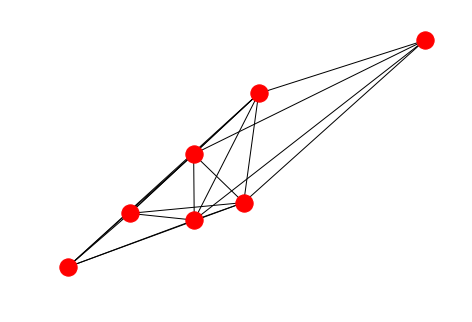

In [30]:
%matplotlib inline
import networkx as nx

g = nx.from_numpy_matrix(membership_adj.values)
nx.draw(g)

It's **pretty ugly**. We could force it to be circular if we wanted, but it's still pretty ugly.

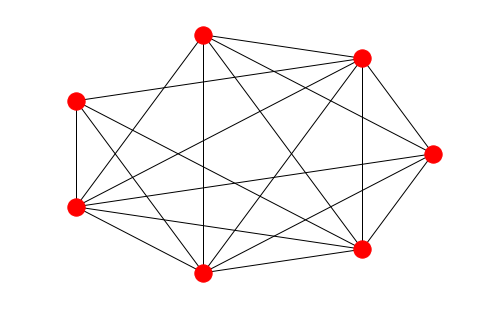

In [32]:
g = nx.from_numpy_matrix(membership_adj.values)
nx.draw_circular(g)

## Fixing up our visualization

If we want to customize our visualization - change our nodes up and our edges, etc - we're going to need to draw this step by step, and not use `nx.draw` any more. It takes **a few steps:** 

1. Create your graph
2. Create a layout for your nodes
3. Draw the parts you want
4. Turn off the axis because I know you don't want it
5. Use `matplotlib` to display your graph

When we clean things up and get smarter it's going to change, but hey, it's a good start!

**Four things you can draw:**

* Nodes
* Edges
* Node labels
* Edge labels

In [40]:
membership_adj.values

array([[21, 11,  5,  0,  9,  1,  3],
       [11, 62,  5,  3, 16,  3,  8],
       [ 5,  5, 17,  0,  5,  2,  2],
       [ 0,  3,  0, 10,  3,  2,  2],
       [ 9, 16,  5,  3, 59,  3, 13],
       [ 1,  3,  2,  2,  3, 53,  3],
       [ 3,  8,  2,  2, 13,  3, 97]])

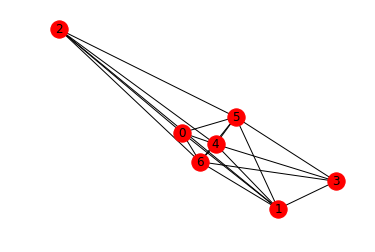

In [39]:
import matplotlib.pyplot as plt

# 1. Create the graph
g = nx.from_numpy_matrix(membership_adj.values)

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g, iterations=20)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout)
nx.draw_networkx_nodes(g, layout)
nx.draw_networkx_labels(g, layout)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

# 5. Tell matplotlib to show it (kind of optional)
plt.show()

### Improvement 1.1: Labeling our nodes

Let's label our nodes so we know what is what.

In [41]:
# This is magic, but we'll use it
g = nx.from_numpy_matrix(membership_adj.values)
dict((zip(g.nodes(), membership_adj.columns)))

{0: 'Boston Committee',
 1: 'London Enemies',
 2: 'Long Room Club',
 3: 'Loyal Nine',
 4: 'North Caucus',
 5: 'St Andrews Lodge',
 6: 'Tea Party'}

Renaming nodes with {0: 'Boston Committee', 1: 'London Enemies', 2: 'Long Room Club', 3: 'Loyal Nine', 4: 'North Caucus', 5: 'St Andrews Lodge', 6: 'Tea Party'}


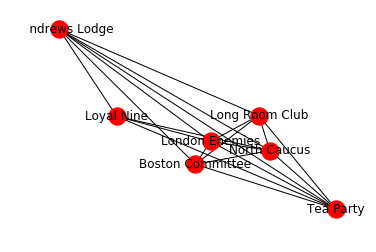

In [42]:
# 1. Create the graph
g = nx.from_numpy_matrix(membership_adj.values)

# 1.5 Rename our nodes from boring numbers
# copy=False is like inplace=True
renamed = dict(zip(g.nodes(), membership_adj.columns))
print("Renaming nodes with", renamed)
nx.relabel_nodes(g, renamed, copy=False)

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=20)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout)
nx.draw_networkx_nodes(g, layout)
nx.draw_networkx_labels(g, layout)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

# 5. Tell matplotlib to show it
plt.show()

### Improvement 1.2: Editing our layout

We can **make it round**! We need to replace our `spring_layout` with a `circular_layout`

Renaming nodes with {0: 'Boston Committee', 1: 'London Enemies', 2: 'Long Room Club', 3: 'Loyal Nine', 4: 'North Caucus', 5: 'St Andrews Lodge', 6: 'Tea Party'}


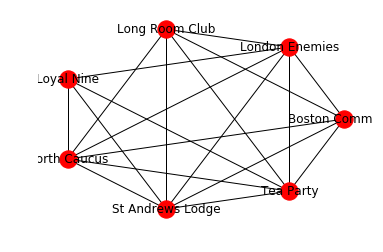

In [45]:
# 1. Create the graph
g = nx.from_numpy_matrix(membership_adj.values)

# 1.5 Rename our nodes from boring numbers
# copy=False is like inplace=True
renamed = dict(zip(g.nodes(), membership.columns))
print("Renaming nodes with", renamed)
nx.relabel_nodes(g, renamed, copy=False)

# 2. Create a layout for our nodes 
layout = nx.circular_layout(g)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout)
nx.draw_networkx_nodes(g, layout)
nx.draw_networkx_labels(g, layout)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

# 5. Tell matplotlib to show it
plt.show()

### Improvement 1.3: Edge weights

If we want to make our edge thicknesses change according to their number of connections, we need to build a list of weights. We'll do that by doing a list comprehension and passing it to `draw_networkx_edges`.

In [51]:
# These are some of our edges
# data=True shows us the extra data
#g.edges(data=True)
g.edges(data=True)[:5]

[('Boston Committee', 'Boston Committee', {'weight': 21}),
 ('Boston Committee', 'London Enemies', {'weight': 11}),
 ('Boston Committee', 'Long Room Club', {'weight': 5}),
 ('Boston Committee', 'North Caucus', {'weight': 9}),
 ('Boston Committee', 'St Andrews Lodge', {'weight': 1})]

In [53]:
for edge in g.edges(data=True):
    print(edge)
    print("-------")

('Boston Committee', 'Boston Committee', {'weight': 21})
-------
('Boston Committee', 'London Enemies', {'weight': 11})
-------
('Boston Committee', 'Long Room Club', {'weight': 5})
-------
('Boston Committee', 'North Caucus', {'weight': 9})
-------
('Boston Committee', 'St Andrews Lodge', {'weight': 1})
-------
('Boston Committee', 'Tea Party', {'weight': 3})
-------
('London Enemies', 'London Enemies', {'weight': 62})
-------
('London Enemies', 'Long Room Club', {'weight': 5})
-------
('London Enemies', 'Loyal Nine', {'weight': 3})
-------
('London Enemies', 'North Caucus', {'weight': 16})
-------
('London Enemies', 'St Andrews Lodge', {'weight': 3})
-------
('London Enemies', 'Tea Party', {'weight': 8})
-------
('Long Room Club', 'Long Room Club', {'weight': 17})
-------
('Long Room Club', 'North Caucus', {'weight': 5})
-------
('Long Room Club', 'St Andrews Lodge', {'weight': 2})
-------
('Long Room Club', 'Tea Party', {'weight': 2})
-------
('Loyal Nine', 'Loyal Nine', {'weight': 

In [54]:
for source, target, data in g.edges(data=True):
    print("Source is", source)
    print("Target is", target)
    print("Data is", data)
    print("------------")

Source is Boston Committee
Target is Boston Committee
Data is {'weight': 21}
------------
Source is Boston Committee
Target is London Enemies
Data is {'weight': 11}
------------
Source is Boston Committee
Target is Long Room Club
Data is {'weight': 5}
------------
Source is Boston Committee
Target is North Caucus
Data is {'weight': 9}
------------
Source is Boston Committee
Target is St Andrews Lodge
Data is {'weight': 1}
------------
Source is Boston Committee
Target is Tea Party
Data is {'weight': 3}
------------
Source is London Enemies
Target is London Enemies
Data is {'weight': 62}
------------
Source is London Enemies
Target is Long Room Club
Data is {'weight': 5}
------------
Source is London Enemies
Target is Loyal Nine
Data is {'weight': 3}
------------
Source is London Enemies
Target is North Caucus
Data is {'weight': 16}
------------
Source is London Enemies
Target is St Andrews Lodge
Data is {'weight': 3}
------------
Source is London Enemies
Target is Tea Party
Data is {'w

In [60]:
g.edges(data=True)

[('Boston Committee', 'Boston Committee', {'weight': 21}),
 ('Boston Committee', 'London Enemies', {'weight': 11}),
 ('Boston Committee', 'Long Room Club', {'weight': 5}),
 ('Boston Committee', 'North Caucus', {'weight': 9}),
 ('Boston Committee', 'St Andrews Lodge', {'weight': 1}),
 ('Boston Committee', 'Tea Party', {'weight': 3}),
 ('London Enemies', 'London Enemies', {'weight': 62}),
 ('London Enemies', 'Long Room Club', {'weight': 5}),
 ('London Enemies', 'Loyal Nine', {'weight': 3}),
 ('London Enemies', 'North Caucus', {'weight': 16}),
 ('London Enemies', 'St Andrews Lodge', {'weight': 3}),
 ('London Enemies', 'Tea Party', {'weight': 8}),
 ('Long Room Club', 'Long Room Club', {'weight': 17}),
 ('Long Room Club', 'North Caucus', {'weight': 5}),
 ('Long Room Club', 'St Andrews Lodge', {'weight': 2}),
 ('Long Room Club', 'Tea Party', {'weight': 2}),
 ('Loyal Nine', 'Loyal Nine', {'weight': 10}),
 ('Loyal Nine', 'North Caucus', {'weight': 3}),
 ('Loyal Nine', 'St Andrews Lodge', {'wei

In [61]:
# We can use a list comprehension to just pull out the weight
# And yes, we're taking each part of the above piece by piece,
#   * the source (Boston Committee)
#   * the target (London Enemies)
#   * the data ({'weight': 11})
[data['weight'] / 2 for source, target, data in g.edges(data=True)]

[10.5,
 5.5,
 2.5,
 4.5,
 0.5,
 1.5,
 31.0,
 2.5,
 1.5,
 8.0,
 1.5,
 4.0,
 8.5,
 2.5,
 1.0,
 1.0,
 5.0,
 1.5,
 1.0,
 1.0,
 29.5,
 1.5,
 6.5,
 26.5,
 1.5,
 48.5]

Now we're going to take those edge widths and give them to `draw_networkx_edges`.

Renaming nodes with {0: 'Boston Committee', 1: 'London Enemies', 2: 'Long Room Club', 3: 'Loyal Nine', 4: 'North Caucus', 5: 'St Andrews Lodge', 6: 'Tea Party'}


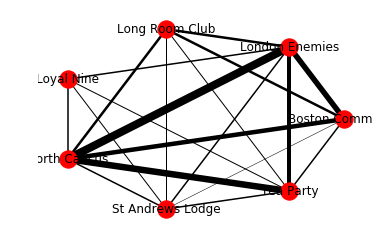

In [62]:
# 1. Create the graph
g = nx.from_numpy_matrix(membership_adj.values)

# 1.5 Rename our nodes from boring numbers
# copy=False is like inplace=True
renamed = dict(zip(g.nodes(), membership.columns))
print("Renaming nodes with", renamed)
nx.relabel_nodes(g, renamed, copy=False)

# 2. Create a layout for our nodes 
layout = nx.circular_layout(g)

# 2.1 Make a list of widths
edge_widths = [data['weight'] / 2 for source, target, data in g.edges(data=True)]

# 3. Draw the parts we want
# 3.1 Give draw_networkx_edges our edge widths with width=
nx.draw_networkx_edges(g, layout, width=edge_widths)
nx.draw_networkx_nodes(g, layout)
nx.draw_networkx_labels(g, layout)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

# 5. Tell matplotlib to show it
plt.show()


Not terribly attractive, is it? Let's fix it up a bit more.

Renaming nodes with {0: 'Boston Committee', 1: 'London Enemies', 2: 'Long Room Club', 3: 'Loyal Nine', 4: 'North Caucus', 5: 'St Andrews Lodge', 6: 'Tea Party'}


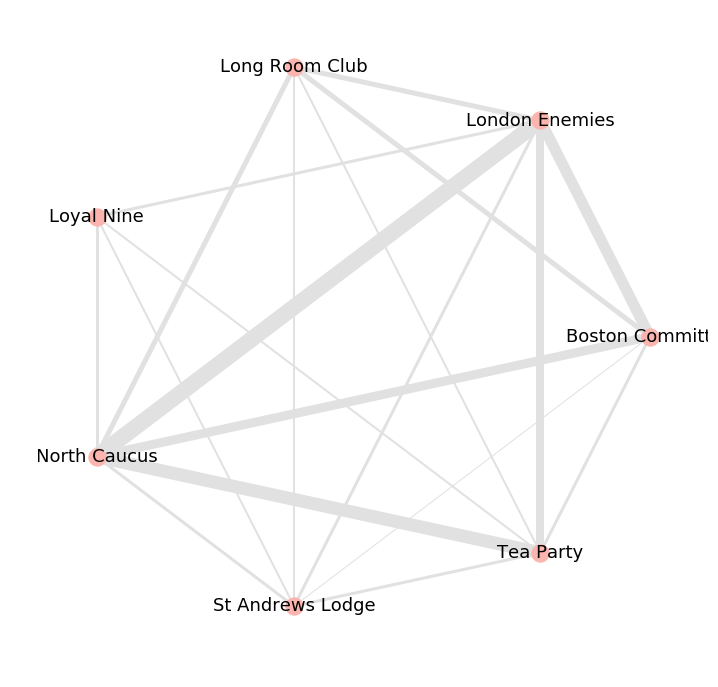

In [68]:
import matplotlib.pyplot as plt

# 0. Make it bigger!
plt.figure(figsize=(12,12))

# 1. Create the graph
g = nx.from_numpy_matrix(membership_adj.values)

# 1.5 Rename our nodes from boring numbers
# copy=False is like inplace=True
renamed = dict(zip(g.nodes(), membership.columns))
print("Renaming nodes with", renamed)
nx.relabel_nodes(g, renamed, copy=False)

# 2. Create a layout for our nodes 
layout = nx.circular_layout(g)

# 2.1 Make a list of weights
edge_widths = [data['weight'] for source, target, data in g.edges(data=True)]

# 3. Draw the parts we want
# 3.1 Give it our edge widths
nx.draw_networkx_edges(g, layout, width=edge_widths, edge_color='#E1E1E1')
nx.draw_networkx_nodes(g, layout, node_color='#fbb4ae')
nx.draw_networkx_labels(g, layout, font_family='Helvetica', font_size=18)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

# 4.5 Save it if you want
plt.savefig("graph.pdf")

# 5. Tell matplotlib to show it
plt.show()